# CUSTOMER DATA PREPROCESSING

In [2]:
import os, sys, time, json, csv

# 1. Read in the provided ACW Data using the CSV library.

In [ ]:

with open('acw_user_data.csv', newline='') as csvfile:
    acw_data = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in acw_data:
        print(row)

### 2.  Convert all flat structures into nested structures.

In [40]:

# Open the CSV file and create a dictionary to hold the data
with open('acw_user_data.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    data = {}


    # Group the data by the 'Address' column
    for row in reader:
        address = {'Street': row['Address Street'], 'City': row['Address City'], 'Postcode': row['Address Postcode']}
        card = {'Start Date': row['Credit Card Start Date'], 'Expiry Date': row['Credit Card Expiry Date'], 'Number': row['Credit Card Number'], 'CVV': row['Credit Card CVV'],'Bank IBAN': row['Bank IBAN']}
        vehicle = {'Make': row['Vehicle Make'], 'Model': row['Vehicle Model'], 'Year': row['Vehicle Year'], 'Type': row['Vehicle Type']}
#         person = {'First Name': row['First Name'], 'Last Name': row['Last Name'], 'Age': int(row['Age (Years)']), 'Sex': row['Sex'], 'Marital Status': row['Marital Status'], 'Dependants': int(row['Dependants']), 'Employer Company': row['Employer Company'],'Yearly Pension (GBP)': int(row['Yearly Pension (GBP)']), 'Retired': bool(row['Retired']), 'Yearly Salary (GBP)': int(row['Yearly Salary (GBP)']), 'Credit Card': card, 'Vehicle': vehicle, 'Address': address}
        person = {'First Name': row['First Name'], 'Last Name': row['Last Name'], 'Age': int(row['Age (Years)']), 'Sex': row['Sex'], 'Marital Status': row['Marital Status'], 'Dependants': row['Dependants'], 'Employer Company': row['Employer Company'],'Distance Commuted to Work (miles)':float(row['Distance Commuted to Work (miles)']),'Yearly Pension (GBP)': int(row['Yearly Pension (GBP)']), 'Retired': bool(row['Retired']), 'Yearly Salary (GBP)': int(row['Yearly Salary (GBP)']), 'Credit Card': card, 'Vehicle': vehicle, 'Address': address}


        data.setdefault('customer', []).append(person)
   

print(data)




{'customer': [{'First Name': 'Kieran', 'Last Name': 'Wilson', 'Age': 89, 'Sex': 'Male', 'Marital Status': 'married or civil partner', 'Dependants': '3', 'Employer Company': 'N/A', 'Distance Commuted to Work (miles)': 0.0, 'Yearly Pension (GBP)': 7257, 'Retired': True, 'Yearly Salary (GBP)': 72838, 'Credit Card': {'Start Date': '08/18', 'Expiry Date': '11/27', 'Number': '676373692463', 'CVV': '875', 'Bank IBAN': 'GB62PQKB71416034141571'}, 'Vehicle': {'Make': 'Hyundai', 'Model': 'Bonneville', 'Year': '2009', 'Type': 'Pickup'}, 'Address': {'Street': '70 Lydia isle', 'City': 'Lake Conor', 'Postcode': 'S71 7XZ'}}, {'First Name': 'Jonathan', 'Last Name': 'Thomas', 'Age': 46, 'Sex': 'Male', 'Marital Status': 'married or civil partner', 'Dependants': '1', 'Employer Company': 'Begum-Williams', 'Distance Commuted to Work (miles)': 13.72, 'Yearly Pension (GBP)': 0, 'Retired': True, 'Yearly Salary (GBP)': 54016, 'Credit Card': {'Start Date': '08/12', 'Expiry Date': '11/26', 'Number': '452943685412

There are missing values in the dependents field, hence the values can't be casted to integers. 

# 3. Identify the problematic rows

In [41]:
#Count fields with null values
with open('acw_user_data.csv', newline='') as csvfile:
    acw_data = csv.reader(csvfile)
    
    header = next(acw_data)
    null_fields = []
    for row in acw_data:
        for i, value in enumerate(row):
            if not value:  # if the value is null (i.e., an empty string)
                null_fields.append((header[i], row[10]))  # store column name and row ID  
        
print(f'There are {len(null_fields)} fields with null values')

There are 19 fields with null values


In [42]:
#Print a list of problematic rows (rows with null values) for dependants

with open('acw_user_data.csv', 'r') as file:
    reader = csv.reader(file)

    # Iterate over the rows and return the row number
    for i, row in enumerate(reader):
        null_list = []
        if row[10] == '':
            print(i)
                        


22
110
180
206
271
273
275
359
461
469
580
637
680
726
823
866
918
932
984


In [45]:
# Replace null dependants values with 1
with open('acw_user_data.csv', newline='') as csvfile:
    acw_data = csv.reader(csvfile)
    rows = list(acw_data)
#     print(rows)

    #Identify the column index of the column that you want to check for null values
    header_row = rows[0]
    column_index = header_row.index('Dependants')
    
    #Iterate over the rows of the CSV file and replace any null values in the specified column with 1
    for row in rows[1:]:
        if row[column_index] == '':
            row[column_index] = 1
            
    #Write the updated rows back to a new CSV file.        
with open('acw_user_data_updated.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(rows)

In [46]:
#Check for fields with null values in updated file
with open('acw_user_data_updated.csv', newline='') as csvfile:
    acw_data = csv.reader(csvfile)
    
    header = next(acw_data)
    null_fields = []
    for row in acw_data:
        for i, value in enumerate(row):
            if not value:  # if the value is null (i.e., an empty string)
                null_fields.append((header[i], row[10]))  # store column name and row ID
        
print(f'There are {len(null_fields)} fields with null values')

There are 0 fields with null values


In [47]:
# Convert all flat structures into nested structures using the updated csv data where the dependants column is cast to integer

with open('acw_user_data_updated.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    data = {}


    # Group the data by the 'Address' column
    for row in reader:
        address = {'Street': row['Address Street'], 'City': row['Address City'], 'Postcode': row['Address Postcode']}
        card = {'Start Date': row['Credit Card Start Date'], 'Expiry Date': row['Credit Card Expiry Date'], 'Number': row['Credit Card Number'], 'CVV': row['Credit Card CVV'],'Bank IBAN': row['Bank IBAN']}
        vehicle = {'Make': row['Vehicle Make'], 'Model': row['Vehicle Model'], 'Year': row['Vehicle Year'], 'Type': row['Vehicle Type']}
        person = {'First Name': row['First Name'], 'Last Name': row['Last Name'], 'Age': int(row['Age (Years)']), 'Sex': row['Sex'], 'Marital Status': row['Marital Status'], 'Dependants': int(row['Dependants']), 'Employer Company': row['Employer Company'],'Distance Commuted to Work (miles)':float(row['Distance Commuted to Work (miles)']),'Yearly Pension (GBP)': int(row['Yearly Pension (GBP)']), 'Retired':row['Retired'], 'Yearly Salary (GBP)': int(row['Yearly Salary (GBP)']), 'Credit Card': card, 'Vehicle': vehicle, 'Address': address}


        data.setdefault('customer', []).append(person)
   

print(data)




{'customer': [{'First Name': 'Kieran', 'Last Name': 'Wilson', 'Age': 89, 'Sex': 'Male', 'Marital Status': 'married or civil partner', 'Dependants': 3, 'Employer Company': 'N/A', 'Distance Commuted to Work (miles)': 0.0, 'Yearly Pension (GBP)': 7257, 'Retired': 'True', 'Yearly Salary (GBP)': 72838, 'Credit Card': {'Start Date': '08/18', 'Expiry Date': '11/27', 'Number': '676373692463', 'CVV': '875', 'Bank IBAN': 'GB62PQKB71416034141571'}, 'Vehicle': {'Make': 'Hyundai', 'Model': 'Bonneville', 'Year': '2009', 'Type': 'Pickup'}, 'Address': {'Street': '70 Lydia isle', 'City': 'Lake Conor', 'Postcode': 'S71 7XZ'}}, {'First Name': 'Jonathan', 'Last Name': 'Thomas', 'Age': 46, 'Sex': 'Male', 'Marital Status': 'married or civil partner', 'Dependants': 1, 'Employer Company': 'Begum-Williams', 'Distance Commuted to Work (miles)': 13.72, 'Yearly Pension (GBP)': 0, 'Retired': 'False', 'Yearly Salary (GBP)': 54016, 'Credit Card': {'Start Date': '08/12', 'Expiry Date': '11/26', 'Number': '45294368541

In [170]:
# with open('acw_user_data.csv', newline='') as csvfile:
#     acw_data = csv.reader(csvfile)
    
#     for i, row in enumerate(acw_data):
#         if i in [0,9,22,16,58, 80, 98]:
            
#             print(row[10])

Dependants
2
2

2
2
1


# 4. Write all records to a processed.json file in the JSON data format.

In [48]:

with open("processed.json", "w") as outfile:
    json.dump(data, outfile)
 

 # open the file and read its contents
with open('processed.json', 'r') as f:
    json_data = f.read()

# parse the JSON data into a Python dictionary
data2 = json.loads(json_data)

print(data2)

{'customer': [{'First Name': 'Kieran', 'Last Name': 'Wilson', 'Age': 89, 'Sex': 'Male', 'Marital Status': 'married or civil partner', 'Dependants': 3, 'Employer Company': 'N/A', 'Distance Commuted to Work (miles)': 0.0, 'Yearly Pension (GBP)': 7257, 'Retired': 'True', 'Yearly Salary (GBP)': 72838, 'Credit Card': {'Start Date': '08/18', 'Expiry Date': '11/27', 'Number': '676373692463', 'CVV': '875', 'Bank IBAN': 'GB62PQKB71416034141571'}, 'Vehicle': {'Make': 'Hyundai', 'Model': 'Bonneville', 'Year': '2009', 'Type': 'Pickup'}, 'Address': {'Street': '70 Lydia isle', 'City': 'Lake Conor', 'Postcode': 'S71 7XZ'}}, {'First Name': 'Jonathan', 'Last Name': 'Thomas', 'Age': 46, 'Sex': 'Male', 'Marital Status': 'married or civil partner', 'Dependants': 1, 'Employer Company': 'Begum-Williams', 'Distance Commuted to Work (miles)': 13.72, 'Yearly Pension (GBP)': 0, 'Retired': 'False', 'Yearly Salary (GBP)': 54016, 'Credit Card': {'Start Date': '08/12', 'Expiry Date': '11/26', 'Number': '45294368541

# 5 . Create two additional file outputs, retired.json and employed.json

In [49]:
#Create retired.json
for key, value in data2.items():
      value 
retired = [customer for customer in value if customer['Retired'] == str(True)]

with open("retired.json", "w") as outfile:
    json.dump(retired, outfile)

In [50]:
# Check retired.json
with open('retired.json', 'r') as f:
    json_data = f.read()

# parse the JSON data into a Python dictionary
check_retired = json.loads(json_data)
len(check_retired)

246

In [51]:
# Create employed.json
for key, value in data2.items():
      value 
employed = [customer for customer in value if customer['Employer Company'] != 'N/A']

with open("employed.json", "w") as outfile:
    json.dump(employed, outfile)

In [52]:
# Check employed.json
with open('employed.json', 'r') as f:
    json_data = f.read()
    
check_employed = json.loads(json_data)
len(check_employed)

754

### 6.The client states that there may be some issues with credit card entries. Any customers that have more than 10 years between their start and end date need writing to a separate file, called remove_ccard.json, in the JSON data format. The client will manually deal with these later based on your output. They request that you write a function to help perform this, which accepts a single row from the CSV data, and outputs whether the row should be flagged. This can then be used when determining whether to write the current person to the remove_ccard file.

In [53]:
#Create card period row. It's the difference between the credit card expiry date and the credit card start date  
for key, value in data2.items():
      value    
card_period = [(int(customer['Credit Card']['Expiry Date'].split('/')[1]) - int(customer['Credit Card']['Start Date'].split('/')[1])) for customer in value]   


In [54]:
def remove_ccard(card_period):   
    for key, value in data2.items():
          value    
    remove_ccard = [customer for customer in value if (int(customer['Credit Card']['Expiry Date'].split('/')[1]) - int(customer['Credit Card']['Start Date'].split('/')[1])) > 10]

    for i in card_period:
        if i >10:
            print(f'Card Period is {i} years. Flag row {card_period.index(i)}')
        else:
            print(f"Card Period is {i} years. Don't flag row")

            
    #Create remove_ccard.json file
    with open("remove_ccard.json", "w") as outfile:
        json.dump(remove_ccard, outfile)


In [55]:
remove_ccard(card_period)


Card Period is 9 years. Don't flag row
Card Period is 14 years. Flag row 1
Card Period is 8 years. Don't flag row
Card Period is 1 years. Don't flag row
Card Period is 8 years. Don't flag row
Card Period is 0 years. Don't flag row
Card Period is 17 years. Flag row 6
Card Period is 12 years. Flag row 7
Card Period is 7 years. Don't flag row
Card Period is 0 years. Don't flag row
Card Period is 10 years. Don't flag row
Card Period is 4 years. Don't flag row
Card Period is 4 years. Don't flag row
Card Period is 3 years. Don't flag row
Card Period is 7 years. Don't flag row
Card Period is 15 years. Flag row 15
Card Period is 3 years. Don't flag row
Card Period is 9 years. Don't flag row
Card Period is 3 years. Don't flag row
Card Period is 8 years. Don't flag row
Card Period is 2 years. Don't flag row
Card Period is 5 years. Don't flag row
Card Period is 8 years. Don't flag row
Card Period is 12 years. Flag row 7
Card Period is 1 years. Don't flag row
Card Period is 8 years. Don't flag row

# 7. Calculate Salary-Commute and add field to prossessed file

In [85]:
with open('processed.json', 'r') as f:
    json_data = f.read()

# parse the JSON data into a Python dictionary
processed = json.loads(json_data)



for customer_dict, customer_details in processed.items():
    for customer in customer_details:
        if customer['Distance Commuted to Work (miles)'] <= 1:
            customer['Salary_Commute'] = customer['Yearly Salary (GBP)']
        else:
            customer['Salary_Commute'] = round(customer['Yearly Salary (GBP)'] / customer['Distance Commuted to Work (miles)'],2)


customer_details_sorted = sorted(customer_details, key=lambda x:x['Salary_Commute']) 
print(customer_details_sorted)

[{'First Name': 'Graeme', 'Last Name': 'Jackson', 'Age': 52, 'Sex': 'Male', 'Marital Status': 'single', 'Dependants': 2, 'Employer Company': 'Smith, Birch and Burke', 'Distance Commuted to Work (miles)': 5.52, 'Yearly Pension (GBP)': 0, 'Retired': 'False', 'Yearly Salary (GBP)': 17046, 'Credit Card': {'Start Date': '06/14', 'Expiry Date': '04/29', 'Number': '4713424668774153', 'CVV': '3053', 'Bank IBAN': 'GB09ELJH35362236053720'}, 'Vehicle': {'Make': 'Chevrolet', 'Model': 'Rally Wagon 1500', 'Year': '2011', 'Type': 'SUV'}, 'Address': {'Street': 'Studio 9 Reid lights', 'City': 'South Ryan', 'Postcode': 'E27 9GY'}, 'Salary_Commute': 3088.04}, {'First Name': 'Janet', 'Last Name': 'Quinn', 'Age': 30, 'Sex': 'Female', 'Marital Status': 'married or civil partner', 'Dependants': 1, 'Employer Company': 'Wood-Davies', 'Distance Commuted to Work (miles)': 5.64, 'Yearly Pension (GBP)': 0, 'Retired': 'False', 'Yearly Salary (GBP)': 17428, 'Credit Card': {'Start Date': '02/12', 'Expiry Date': '02/2

In [86]:
with open("commute.json", "w") as outfile:
    json.dump(customer_details_sorted, outfile)

In [88]:
with open('commute.json', 'r') as f:
    json_data = f.read()

# parse the JSON data into a Python dictionary
commute = json.loads(json_data)


# print(commute)


# DATA VISUALISATION

In [90]:
import pandas as pd
import seaborn as sns

In [294]:
df = pd.read_csv('acw_user_data.csv')

In [92]:
df.head()

,Address Street,Address City,Address Postcode,Age (Years),Distance Commuted to Work (miles),Employer Company,Credit Card Start Date,Credit Card Expiry Date,Credit Card Number,Credit Card CVV,...,Last Name,Marital Status,Yearly Pension (GBP),Retired,Yearly Salary (GBP),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
0,70 Lydia isle,Lake Conor,S71 7XZ,89,0.00,NaN,08/18,11/27,676373692463,875,...,Wilson,married or civil partner,7257,True,72838,Male,Hyundai,Bonneville,2009,Pickup
1,00 Wheeler wells,Chapmanton,L2 7BT,46,13.72,Begum-Williams,08/12,11/26,4529436854129855,583,...,Thomas,married or civil partner,0,False,54016,Male,Nissan,ATS,1996,Coupe
2,Studio 33K Joel walk,Randallborough,ME3N 1GH,22,16.02,Hill-Wright,11/19,07/27,4091726363083888495,422,...,Jones,married or civil partner,0,False,68049,Male,GMC,Achieva,2015,"Convertible, Coupe"
3,Studio 46S Bethany lights,East Reece,E10 9RJ,56,19.35,Green LLC,10/17,04/18,4671332769487632633,669,...,Shaw,married or civil partner,0,False,91337,Male,Scion,F150 SuperCrew Cab,1994,Pickup
4,Flat 3 Christine views,Fletcherstad,WS2 9SN,57,5.94,"Hill, Evans and Harrison",04/19,11/27,2245094149128526,659,...,O'Brien,married or civil partner,0,False,18446,Female,Buick,Outback,2020,SUV


# 1. Obtain the Data Series for Salary, and Age, and calculate the following: 
####  a. Mean Salary 
#### b. Median Age

In [93]:
#Data Series for Salary
df['Yearly Salary (GBP)']

0      72838
1      54016
2      68049
3      91337
4      18446
       ...  
995    84645
996    93314
997    20940
998    82412
999    25788
Name: Yearly Salary (GBP), Length: 1000, dtype: int64

In [94]:
# Mean Salary
df['Yearly Salary (GBP)'].mean()

57814.078

In [95]:
df['Age (Years)']

0      89
1      46
2      22
3      56
4      57
       ..
995    48
996    22
997    38
998    45
999    80
Name: Age (Years), Length: 1000, dtype: int64

In [96]:
# Median Age
df['Age (Years)'].median()

54.0

# 2. Perform univariate plots of the following data attributes: 
#### a. Age, calculating how many bins would be required for a bin_width of 5 
#### b. Dependents, fixing data errors with seaborn itself 
#### c. Age (of default bins), conditioned on Marital Status

In [114]:
# A. Age, calculating how many bins would be required for a bin_width of 5
age = df['Age (Years)']
num_bins = int((age.max() - age.min()) / 5) + 1
num_bins

print(f' {num_bins} bins will be required')

 15 bins will be required


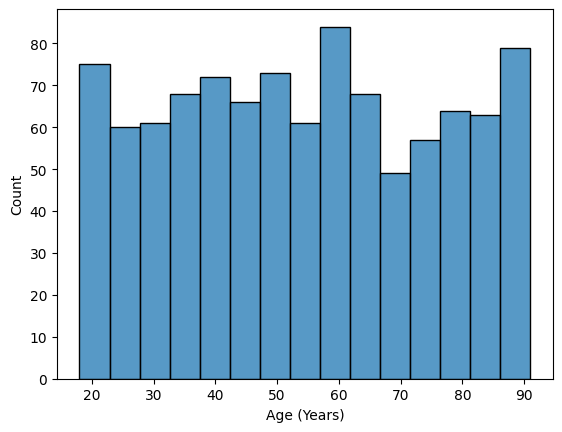

In [315]:
import matplotlib.pyplot as plt
sns.histplot(data=df, x=age, bins=num_bins)
plt.savefig('plot_2a.png')

<AxesSubplot: >

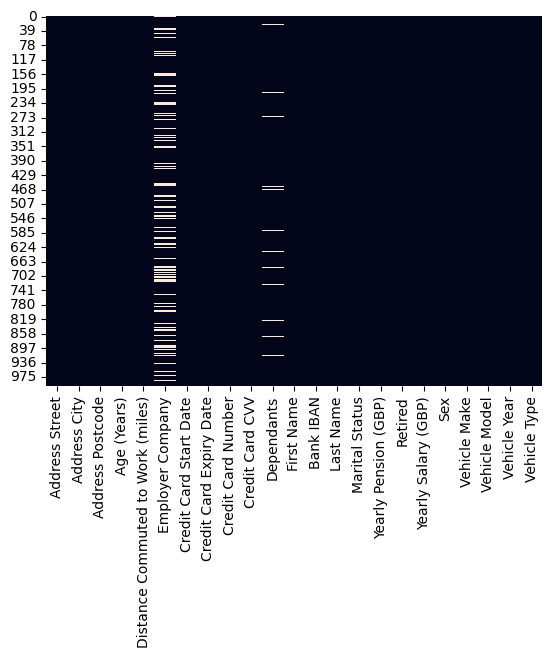

In [161]:
# B. Dependents, fixing data errors with seaborn itself 
#Visualizing fields with null values
sns.heatmap(df.isnull(), cbar=False)

In [162]:
# Replace null values in the dependants field with the mean
df['Dependants'] = df['Dependants'].fillna(df['Dependants'].mean())

In [163]:
#Check for null values
df['Dependants'].isnull().sum()

0

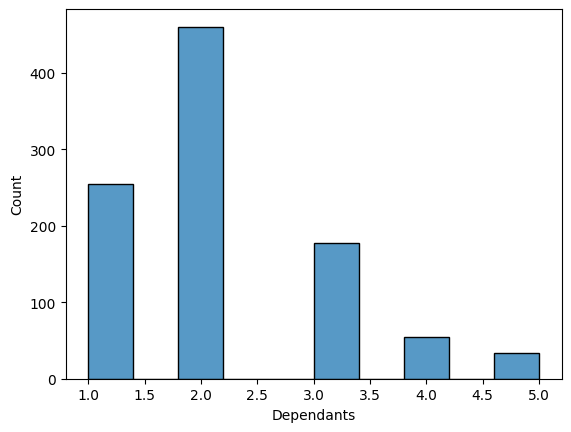

In [305]:
# Create plot using seaborn
plot_2b = sns.histplot(data=df, x='Dependants', bins=10)


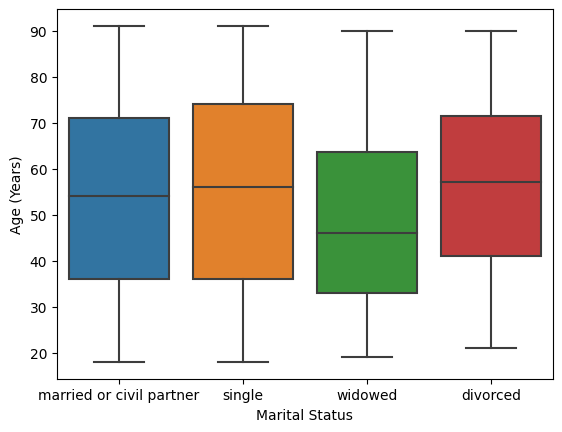

In [306]:
#c. Age (of default bins), conditioned on Marital Status
sns.boxplot(data=df, x='Marital Status', y=age)

# 3. Perform multivariate plots with the following data attributes: 
#### a. Commuted distance against salary 
#### b. Age against Salary 
#### c. Age against Salary conditioned by Dependants

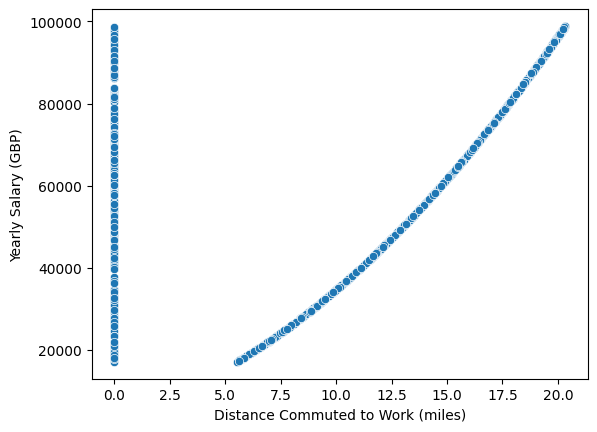

In [307]:
# A. Commuted distance against salary.
# Create scatter plot
sns.scatterplot(data=df, y="Yearly Salary (GBP)", x="Distance Commuted to Work (miles)")



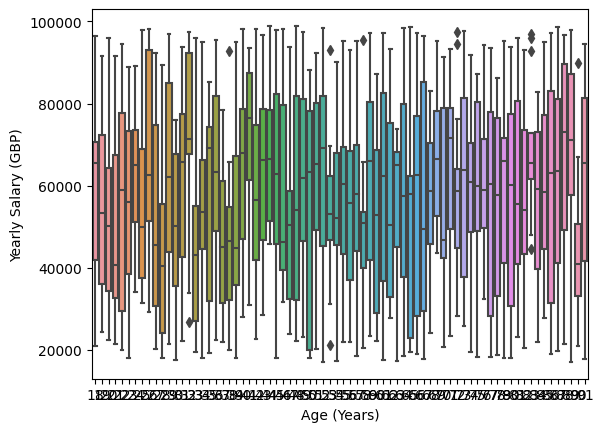

In [308]:
# B. Age against Salary
sns.boxplot(data=df, y="Yearly Salary (GBP)", x="Age (Years)")


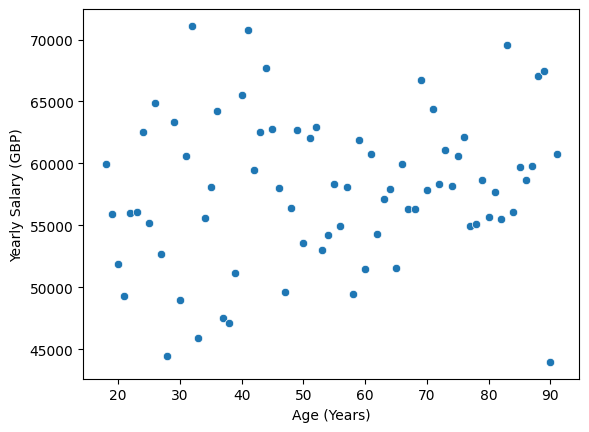

In [309]:
group_df = df[["Age (Years)","Yearly Salary (GBP)"]].groupby("Age (Years)").mean().reset_index()

sns.scatterplot(data=group_df, y="Yearly Salary (GBP)", x="Age (Years)")


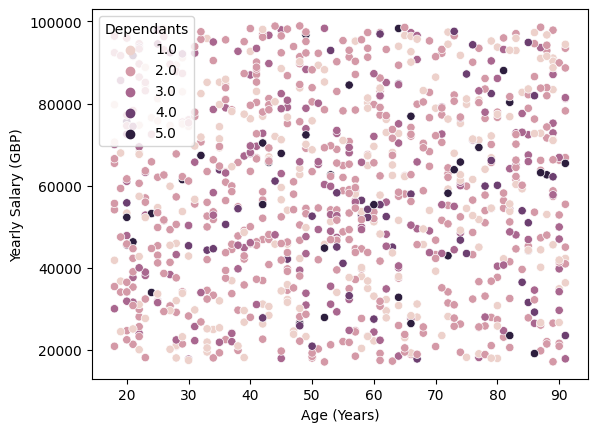

In [310]:
# c. Age against Salary conditioned by Dependants
sns.scatterplot(data=df, y="Yearly Salary (GBP)", x="Age (Years)", hue='Dependants')


# 4. Your client would like the ability to save the plots which you have produced. Provide a Notebook cell which can do this.

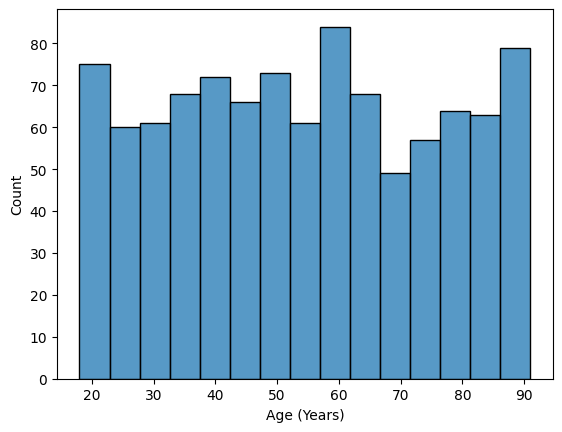

In [322]:
import matplotlib.pyplot as plt

sns.histplot(data=df, x=age, bins=num_bins)
plt.savefig('plot_2a.png')


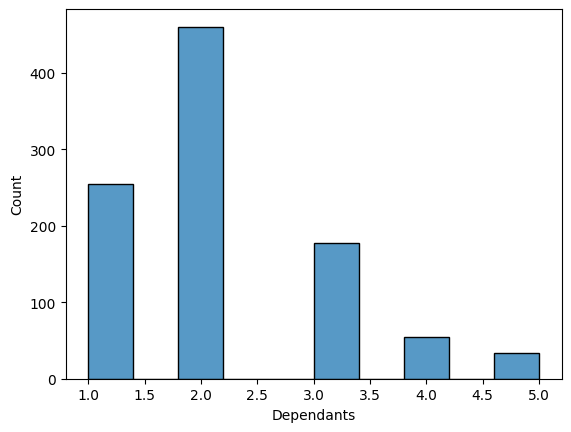

In [323]:
sns.histplot(data=df, x='Dependants', bins=10)
plt.savefig('plot_2b.png')

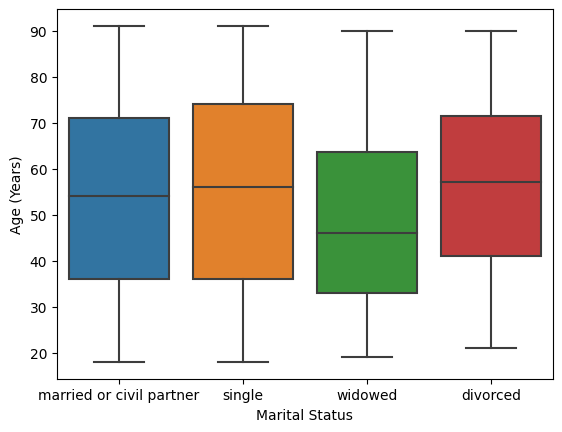

In [324]:
sns.boxplot(data=df, x='Marital Status', y=age)
plt.savefig('plot_2c.png')

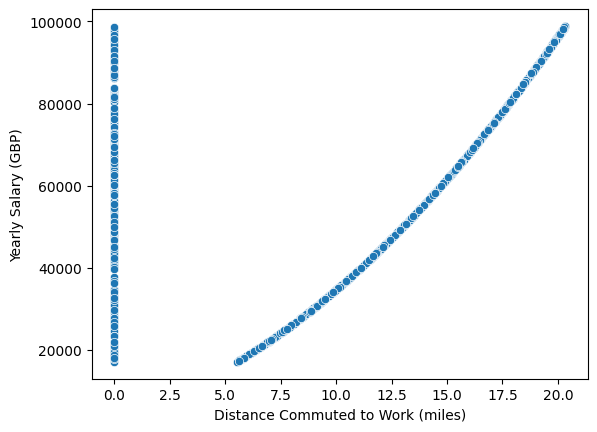

In [325]:
sns.scatterplot(data=df, y="Yearly Salary (GBP)", x="Distance Commuted to Work (miles)")
plt.savefig('plot_3a.png')

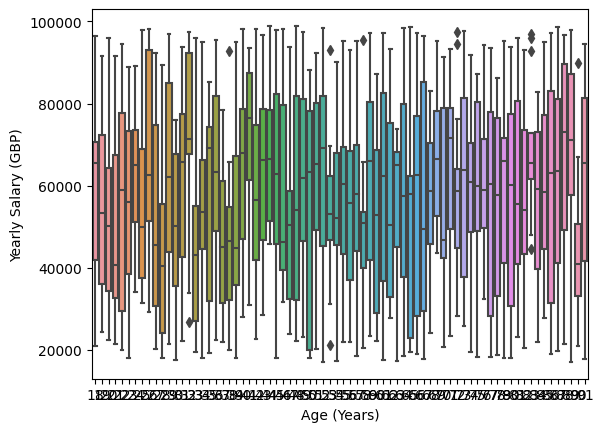

In [326]:
sns.boxplot(data=df, y="Yearly Salary (GBP)", x="Age (Years)")
plt.savefig('plot_3b_i.png')

<AxesSubplot: xlabel='Age (Years)', ylabel='Yearly Salary (GBP)'>

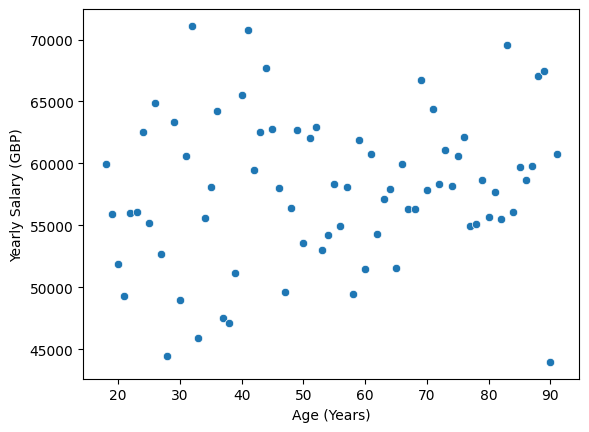

In [327]:
plt.savefig('plot_3b_ii.png')
sns.scatterplot(data=group_df, y="Yearly Salary (GBP)", x="Age (Years)")

<AxesSubplot: xlabel='Age (Years)', ylabel='Yearly Salary (GBP)'>

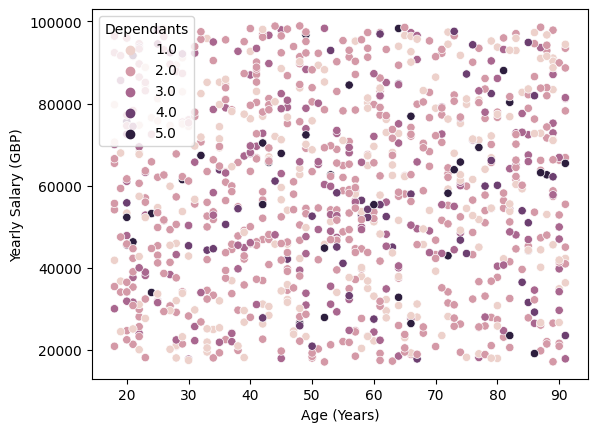

In [328]:
plt.savefig('plot_3c.png')
sns.scatterplot(data=df, y="Yearly Salary (GBP)", x="Age (Years)", hue='Dependants')